In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
X = pd.read_csv(os.path.join(dirname, filenames[0]))
X_Test = pd.read_csv(os.path.join(dirname, filenames[1]))

X['Age'].fillna(X['Age'].mode()[0], inplace=True)
X_Test['Age'].fillna(X_Test['Age'].mode()[0], inplace=True)

### Labling Data
X['Sex'] = X['Sex'].apply({'male':1, 'female':2}.get)
X_Test['Sex'] = X_Test['Sex'].apply({'male':1, 'female':2}.get)

X['Embarked'] = X['Embarked'].apply({'S':1, 'C':2, 'Q':3}.get)
X_Test['Embarked'] = X_Test['Embarked'].apply({'S':1, 'C':2, 'Q':3}.get)


### filling Nans with mode of that column
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)
X_Test['Embarked'].fillna(X_Test['Embarked'].mode()[0], inplace=True)

X_Test['Fare'].fillna(X_Test['Fare'].mode()[0], inplace=True)

### Count char in names
X['Name_count'] = X['Name'].str.len()
X_Test['Name_count'] = X_Test['Name'].str.len()

X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_count
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2.0,51
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1.0,44
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1.0,21
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,1.0,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,24.0,1,2,W./C. 6607,23.4500,NaN,1.0,40
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,2.0,21


In [3]:
from sklearn.model_selection import train_test_split


features = ['Pclass','Sex','SibSp','Parch','Fare','Embarked', 'Age', 'Name_count']

X_Dat = X[features]; Y_Dat = X['Survived']
X_TestN = X_Test[features];

train_X, val_X, train_y, val_y = train_test_split(X_Dat, Y_Dat, random_state=0)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

# Define the model. Set random_state to 1
rf_model = RandomForestClassifier(random_state=1)

# fit your model
rf_model.fit(train_X, train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
train_mae = mean_absolute_error(rf_model.predict(train_X), train_y)
rf_val_mae = mean_absolute_error(rf_model.predict(val_X), val_y)

print("Train MSE: {}".format(train_mae))
print("Validation MAE: {}".format(rf_val_mae))


Train MSE: 0.0029940119760479044
Validation MAE: 0.14349775784753363


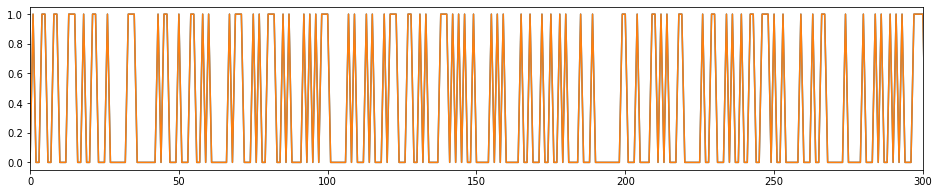

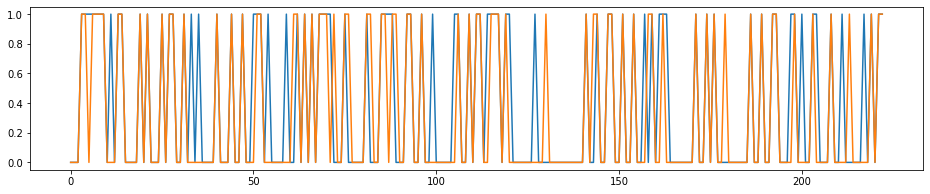

In [5]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 3


xval = np.arange(0,len(train_y))
plt.plot(xval,train_y)
plt.plot(xval,rf_model.predict(train_X))
plt.xlim(0,300)
plt.show()

xval = np.arange(0,len(val_y))
plt.plot(xval,val_y)
plt.plot(xval,rf_model.predict(val_X))
# plt.xlim(0,300)
plt.show()

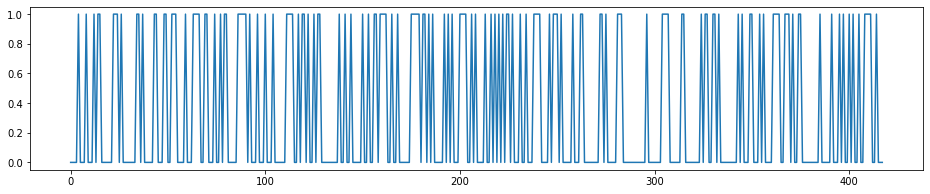

In [6]:
Predictions = rf_model.predict(X_TestN)

plt.plot(Predictions)
# plt.xlim(0,300)
plt.show()

In [7]:
X_Test['Survived'] = Predictions

Prediction_table = X_Test[['PassengerId', 'Survived']].copy()
Prediction_table

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [8]:
Prediction_table.to_csv('submission.csv', index=False)